## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
# Display the data table for preview
mouse_merged = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
mouse_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
mouse_merged.duplicated().sum()

1

In [6]:
#checking the number of mice in the clean DataFrame
count_mouse = len(mouse_merged['Mouse ID'].unique())
count_mouse

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = mouse_merged[mouse_merged.duplicated(['Mouse ID','Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
## Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_merged[mouse_merged['Mouse ID'] !='g989']
clean_mouse_data = clean_data.copy()

clean_data.duplicated().sum()

0

In [9]:
#checking the number of mice in the clean DataFrame
count_mouse = len(clean_data['Mouse ID'].unique())
count_mouse

248

In [10]:
# Removing the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mouse_merged.drop_duplicates(subset = ['Mouse ID', 'Timepoint'], keep ='first', inplace = True)


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_grouped = clean_data.groupby(['Drug Regimen'])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean = regimen_grouped['Tumor Volume (mm3)'].mean()
regimen_median = regimen_grouped['Tumor Volume (mm3)'].median()
regimen_var = regimen_grouped['Tumor Volume (mm3)'].var()
stan_regimen = regimen_grouped['Tumor Volume (mm3)'].std()
sem_regimen = regimen_grouped['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_median,
                                 "Variance": regimen_var, "Standard Deviation": stan_regimen ,
                                 "SEM": sem_regimen})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby('Drug Regimen').agg( Mean = ('Tumor Volume (mm3)', np.mean),
                                       Median = ('Tumor Volume (mm3)', np.median),
                                      Variance = ('Tumor Volume (mm3)', np.var ),
                                       Standard_Deviation = ('Tumor Volume (mm3)', np.std),
                                      SEM = ('Tumor Volume (mm3)', 'sem'))

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

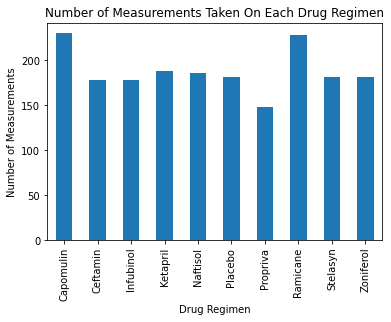

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_groups = clean_mouse_data.groupby('Drug Regimen')
#find out how many drug regimens have been measured
drug_count = drug_groups['Mouse ID'].count()
#Chart the data, give it a title, and label axis
drug_chart = drug_count.plot.bar(title = "Number of Measurements Taken On Each Drug Regimen")
drug_chart.set_xlabel('Drug Regimen')
drug_chart.set_ylabel("Number of Measurements")


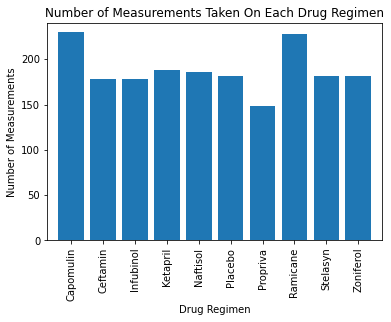

In [55]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_groups = clean_mouse_data.groupby('Drug Regimen')
mouse_df = drug_groups['Mouse ID'].count().reset_index()
x_axis = mouse_df['Drug Regimen'].tolist()
y_axis = mouse_df['Mouse ID'].tolist()
plt.xticks(rotation = 'vertical')
plt.bar(drug_list,mouse_count, align = 'center')

plt.xlim(-0.75,len(drug_list)-.25)
plt.ylim(0, 240)
plt.ylabel('Number of Measurements')
plt.xlabel('Drug Regimen')
plt.title("Number of Measurements Taken On Each Drug Regimen")
plt.show()


In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
